In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from scipy.io import loadmat
from pathlib import Path
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
import mne
import eeg_analysis.funcs4eeg as fe
import re
import imp
import ast
import behavior.func4behav as fb
imp.reload(fe)
imp.reload(fb)

C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_20732\1245709234.py:18: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'behavior.func4behav' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\behavior\\func4behav.py'>

In [2]:
real_to_pick = [1, 3, 5, 9, 18]	
sham_to_pick = [6, 10, 11, 15, 16]
compare_objects = ['RT mean shorten %']
diff_color = '#b8afe6'
font_size = 24
x_size = 9
y_size = 8.5
diff_x = 2.5
diff_y = -10

## Endo

In [3]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[behavior_before['type'] == 1]
    behavior_after = behavior_after[behavior_after['type'] == 1]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)


behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]
behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]

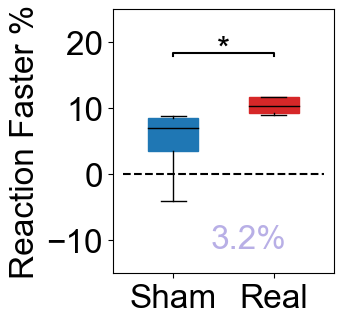

In [4]:

rc('font', family='Arial')

for compare_object in compare_objects:
    watch = 'Endo'
    save_path = os.path.join('..', '..', '..','..','..', 'confNjral', 'EMBC2023', 'poster', 'figs', 'behav_'+watch+'.svg')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    fig, ax = plt.subplots(figsize=(x_size/2.54, y_size/2.54)) # Sizes are in inches
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=1, positions=[1,3], showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 3], ['Sham', 'Real'], fontsize=font_size)
    plt.yticks([-10, 0, 10, 20], fontsize=font_size)
    plt.ylabel("Reaction Faster %", fontsize=font_size)
    plt.ylim(-15, 25)

    ax.hlines(0, 0, 4, colors='k', linestyles='dashed') # Adding a dashed line at y=0

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add significance line and asterisk
    y_max = max(rt_diff_sham.max(), rt_diff_real.max())  # Add some padding
    ax.text(2, y_max-2, "*", ha='center', va='bottom', fontsize=font_size)

    # Draw the square bracket
    bracket_y_pos = y_max - 0.5
    bracket = mlines.Line2D([1, 1, 3, 3], [bracket_y_pos, bracket_y_pos+0.5, bracket_y_pos+0.5, bracket_y_pos], color='k')
    ax.add_line(bracket)

    # Draw arrow between medians and annotate it
    medians = [line.get_ydata()[0] for line in boxplots['medians']]  # get medians
    median_diff = abs(medians[0] - medians[1])  # calculate difference
    # arrow = patches.FancyArrow(1, medians[0], 1.9, medians[1]-medians[0], width=0.02, color='#6a4c93', length_includes_head=True)
    # ax.add_patch(arrow)
    ax.text(diff_x, diff_y, f"{median_diff:.1f}%", ha='center', va='center', fontsize=font_size, color=diff_color)

    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig(save_path, format='svg')

    plt.show()


In [5]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[(behavior_before['valid'] == 1) & (behavior_before['type'] == 1)]
    behavior_after = behavior_after[(behavior_after['valid'] == 1) & (behavior_after['type'] == 1)]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]


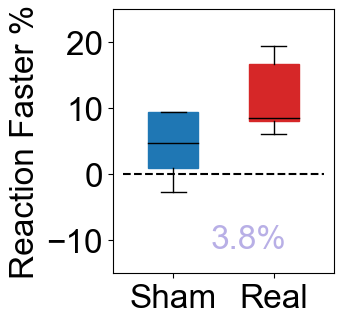

In [6]:

rc('font', family='Arial')
for compare_object in compare_objects:
    watch = 'Endo_valid'
    save_path = os.path.join('..', '..', '..','..','..', 'confNjral', 'EMBC2023', 'poster', 'figs', 'behav_'+watch+'.svg')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    fig, ax = plt.subplots(figsize=(x_size/2.54, y_size/2.54)) # Sizes are in inches
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=1, positions=[1,3], showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor(color)


    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 3], ['Sham', 'Real'], fontsize=font_size)
    plt.yticks([-10, 0, 10, 20], fontsize=font_size)
    plt.ylabel("Reaction Faster %", fontsize=font_size)
    plt.ylim(-15, 25)

    ax.hlines(0, 0, 4, colors='k', linestyles='dashed') # Adding a dashed line at y=0

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add significance line and asterisk
    y_max = max(rt_diff_sham.max(), rt_diff_real.max()) + 2  # Add some padding
    # ax.text(2, y_max-2, "*", ha='center', va='bottom', fontsize=font_size)

    # Draw the square bracket
    # bracket_y_pos = y_max - 0.5
    # bracket = mlines.Line2D([1, 1, 3, 3], [bracket_y_pos, bracket_y_pos+0.5, bracket_y_pos+0.5, bracket_y_pos], color='k')
    # ax.add_line(bracket)

    # Draw arrow between medians and annotate it
    medians = [line.get_ydata()[0] for line in boxplots['medians']]  # get medians
    median_diff = abs(medians[0] - medians[1])  # calculate difference
    # arrow = patches.FancyArrow(1, medians[0], 1.9, medians[1]-medians[0], width=0.02, color='#6a4c93', length_includes_head=True)
    # ax.add_patch(arrow)
    ax.text(diff_x, diff_y, f"{median_diff:.1f}%", ha='center', va='center', fontsize=font_size, color=diff_color)

    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig(save_path, format='svg')

    plt.show()


In [7]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[(behavior_before['valid'] == -1) & (behavior_before['type'] == 1)]
    behavior_after = behavior_after[(behavior_after['valid'] == -1) & (behavior_after['type'] == 1)]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]

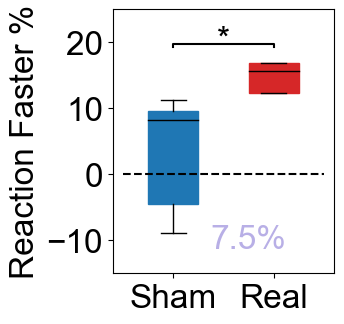

In [8]:

rc('font', family='Arial')

for compare_object in compare_objects:
    watch = 'Endo_invalid'
    save_path = os.path.join('..', '..', '..','..','..', 'confNjral', 'EMBC2023', 'poster', 'figs', 'behav_'+watch+'.svg')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    fig, ax = plt.subplots(figsize=(x_size/2.54, y_size/2.54)) # Sizes are in inches
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=1, positions=[1,3], showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 3], ['Sham', 'Real'], fontsize=font_size)
    plt.yticks([-10, 0, 10, 20], fontsize=font_size)
    plt.ylabel("Reaction Faster %", fontsize=font_size)
    plt.ylim(-15, 25)

    ax.hlines(0, 0, 4, colors='k', linestyles='dashed') # Adding a dashed line at y=0

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add significance line and asterisk
    y_max = max(rt_diff_sham.max(), rt_diff_real.max()) + 2  # Add some padding
    ax.text(2, 18, "*", ha='center', va='bottom', fontsize=font_size)

    # Draw the square bracket
    bracket_y_pos = y_max - 9
    bracket = mlines.Line2D([1, 1, 3, 3], [bracket_y_pos, bracket_y_pos+0.5, bracket_y_pos+0.5, bracket_y_pos], color='k')
    ax.add_line(bracket)

    # Draw arrow between medians and annotate it
    medians = [line.get_ydata()[0] for line in boxplots['medians']]  # get medians
    median_diff = abs(medians[0] - medians[1])  # calculate difference
    # arrow = patches.FancyArrow(1, medians[0], 1.9, medians[1]-medians[0], width=0.02, color='#6a4c93', length_includes_head=True)
    # ax.add_patch(arrow)
    ax.text(diff_x, diff_y, f"{median_diff:.1f}%", ha='center', va='center', fontsize=font_size, color=diff_color)

    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig(save_path, format='svg')

    plt.show()


## Exo

In [9]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[behavior_before['type'] == 2]
    behavior_after = behavior_after[behavior_after['type'] == 2]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]

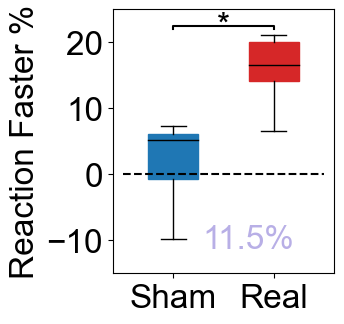

In [10]:

rc('font', family='Arial')

for compare_object in compare_objects:
    watch = 'Exo'
    save_path = os.path.join('..', '..', '..','..','..', 'confNjral', 'EMBC2023', 'poster', 'figs', 'behav_'+watch+'.svg')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    fig, ax = plt.subplots(figsize=(x_size/2.54, y_size/2.54)) # Sizes are in inches
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=1, positions=[1,3], showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 3], ['Sham', 'Real'], fontsize=font_size)
    plt.yticks([-10, 0, 10, 20], fontsize=font_size)
    plt.ylabel("Reaction Faster %", fontsize=font_size)
    plt.ylim(-15, 25)

    ax.hlines(0, 0, 4, colors='k', linestyles='dashed') # Adding a dashed line at y=0

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add significance line and asterisk
    y_max = max(rt_diff_sham.max(), rt_diff_real.max()) + 2  # Add some padding
    ax.text(2, 20, "*", ha='center', va='bottom', fontsize=font_size)

    # Draw the square bracket
    bracket_y_pos = y_max - 1.2
    bracket = mlines.Line2D([1, 1, 3, 3], [bracket_y_pos, bracket_y_pos+0.5, bracket_y_pos+0.5, bracket_y_pos], color='k')
    ax.add_line(bracket)

    # Draw arrow between medians and annotate it
    medians = [line.get_ydata()[0] for line in boxplots['medians']]  # get medians
    median_diff = abs(medians[0] - medians[1])  # calculate difference
    # arrow = patches.FancyArrow(1, medians[0], 1.9, medians[1]-medians[0], width=0.02, color='#6a4c93', length_includes_head=True)
    # ax.add_patch(arrow)
    ax.text(diff_x, diff_y, f"{median_diff:.1f}%", ha='center', va='center', fontsize=font_size, color=diff_color)

    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig(save_path, format='svg')

    plt.show()

In [11]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[(behavior_before['valid'] == 1) & (behavior_before['type'] == 2)]
    behavior_after = behavior_after[(behavior_after['valid'] == 1) & (behavior_after['type'] == 2)]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]

behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]

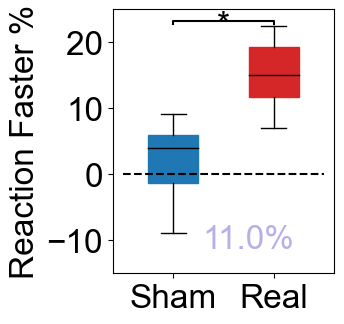

In [12]:

rc('font', family='Arial')

for compare_object in compare_objects:
    watch = 'Exo_valid'
    save_path = os.path.join('..', '..', '..','..','..', 'confNjral', 'EMBC2023', 'poster', 'figs', 'behav_'+watch+'.svg')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    fig, ax = plt.subplots(figsize=(x_size/2.54, y_size/2.54)) # Sizes are in inches
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=1, positions=[1,3], showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 3], ['Sham', 'Real'], fontsize=font_size)
    plt.yticks([-10, 0, 10, 20], fontsize=font_size)
    plt.ylabel("Reaction Faster %", fontsize=font_size)
    plt.ylim(-15, 25)

    ax.hlines(0, 0, 4, colors='k', linestyles='dashed') # Adding a dashed line at y=0

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add significance line and asterisk
    y_max = max(rt_diff_sham.max(), rt_diff_real.max()) + 2  # Add some padding
    ax.text(2, 20.2, "*", ha='center', va='bottom', fontsize=font_size)

    # Draw the square bracket
    bracket_y_pos = y_max - 1.7
    bracket = mlines.Line2D([1, 1, 3, 3], [bracket_y_pos, bracket_y_pos+0.5, bracket_y_pos+0.5, bracket_y_pos], color='k')
    ax.add_line(bracket)

    # Draw arrow between medians and annotate it
    medians = [line.get_ydata()[0] for line in boxplots['medians']]  # get medians
    median_diff = abs(medians[0] - medians[1])  # calculate difference
    # arrow = patches.FancyArrow(1, medians[0], 1.9, medians[1]-medians[0], width=0.02, color='#6a4c93', length_includes_head=True)
    # ax.add_patch(arrow)
    ax.text(diff_x, diff_y, f"{median_diff:.1f}%", ha='center', va='center', fontsize=font_size, color=diff_color)

    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig(save_path, format='svg')

    plt.show()

In [13]:
behavior_compare = fb.create_compare()
for subject_id in range (1,19):
    behavior_before, behavior_after = fb.load_behavior(subject_id)

    # pick endo
    behavior_before = behavior_before[(behavior_before['valid'] == -1) & (behavior_before['type'] == 2)]
    behavior_after = behavior_after[(behavior_after['valid'] == -1) & (behavior_after['type'] == 2)]

    behavior_compare = fb.make_compare(subject_id, behavior_before, behavior_after, behavior_compare) #, verbose=True)

# behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 1]

# behavior_watch = behavior_compare[behavior_compare['Real stimulation'] == 0]

# real_to_pick = [1,3,5,9]
# sham_to_pick = [2,11,15,16]
behavior_compare = behavior_compare[behavior_compare['subject id'].isin(real_to_pick+sham_to_pick)]
# display(behavior_compare.drop(['trials_before', 'trials_after'], axis=1))


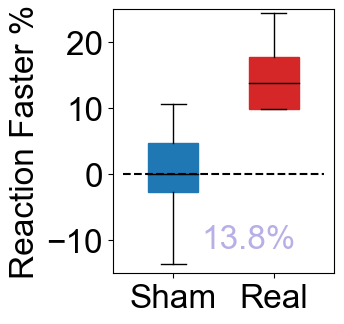

In [14]:

rc('font', family='Arial')

for compare_object in compare_objects:
    watch = 'Exo_invalid'
    save_path = os.path.join('..', '..', '..','..','..', 'confNjral', 'EMBC2023', 'poster', 'figs', 'behav_'+watch+'.svg')

    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    fig, ax = plt.subplots(figsize=(x_size/2.54, y_size/2.54)) # Sizes are in inches
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=1, positions=[1,3], showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 3], ['Sham', 'Real'], fontsize=font_size)
    plt.yticks([-10, 0, 10, 20], fontsize=font_size)
    plt.ylabel("Reaction Faster %", fontsize=font_size)
    plt.ylim(-15, 25)

    ax.hlines(0, 0, 4, colors='k', linestyles='dashed') # Adding a dashed line at y=0

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add significance line and asterisk
    y_max = max(rt_diff_sham.max(), rt_diff_real.max()) + 2  # Add some padding
    # ax.text(2, 20.2, "*", ha='center', va='bottom', fontsize=font_size)

    # Draw the square bracket
    # bracket_y_pos = y_max - 1.7
    # bracket = mlines.Line2D([1, 1, 3, 3], [bracket_y_pos, bracket_y_pos+0.5, bracket_y_pos+0.5, bracket_y_pos], color='k')
    # ax.add_line(bracket)

    # Draw arrow between medians and annotate it
    medians = [line.get_ydata()[0] for line in boxplots['medians']]  # get medians
    median_diff = abs(medians[0] - medians[1])  # calculate difference
    # arrow = patches.FancyArrow(1, medians[0], 1.9, medians[1]-medians[0], width=0.02, color='#6a4c93', length_includes_head=True)
    # ax.add_patch(arrow)
    ax.text(diff_x, diff_y, f"{median_diff:.1f}%", ha='center', va='center', fontsize=font_size, color=diff_color)

    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig(save_path, format='svg')

    plt.show()